In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
pd.__version__

'0.22.0'

In [14]:
dataframe = pd.read_csv("/Users/anthonymunoz/ISTDTerm6/CDS/Computation Data Science/CDSLab4/data.csv",header=None)
dataframe.columns = ['x','y']
#print(dataframe.head(5))

x = np.array(dataframe['x'],dtype=np.float64)
y = np.array(dataframe['y'],dtype=np.float64)

ones = np.ones(len(x))
new_x = np.column_stack((x, ones))


In [15]:
def closed_form(input_x,input_y):
    A = (1/len(input_x)) * np.dot(np.transpose(input_x),input_x)
    b = (1/len(input_x)) * np.dot(np.transpose(input_x),input_y)
    return (np.dot(np.linalg.inv(A),b))

The weight vector is: [1.32243102 7.99102098]


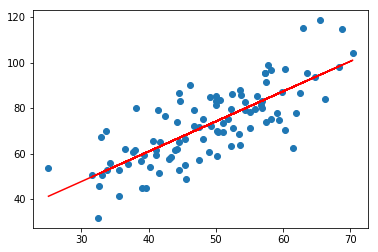

In [16]:
weight = closed_form(new_x,y)

def predict(x, weight):
    return np.dot(x, weight)


plt.scatter(x,y)
plt.plot(x, predict(new_x, weight),color='red')
print("The weight vector is: {}".format(weight))

The Empirical risk: 55.12869173310657
The best weight using gradient descent: [1.57289324 0.30783601]
The weight vector is: [1.32243102 7.99102098]


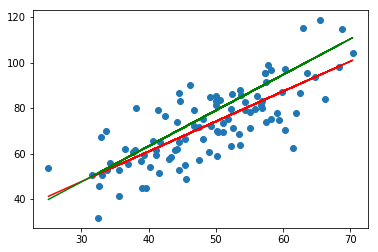

In [46]:
def empirical_risk(x,y,weight):
    sum = (1/len(x)) * np.sum(np.square(y - np.dot(x, weight))/2)
    return sum
print("The Empirical risk: {}".format(empirical_risk(new_x, y, weight)))

def gradient_descent(x, y, learning_rate = 0.0001, iterations = 100):
    weight = np.zeros(2)
    min_weight = 0
    min_risk = sys.maxsize

    for j in range(iterations):
        for i in range(len(x)):         
            randx = x[i]
            randy = y[i]
            weight += (learning_rate) * np.dot(np.array(randy - np.dot(weight, randx)), randx)
            risk = empirical_risk(x, y, weight)
            if risk < min_risk:
                min_risk = risk
                min_weight = weight
    return min_weight

print("The best weight using gradient descent: {}".format(gradient_descent(new_x, y)))
plt.scatter(x,y)
plt.plot(x, predict(new_x, weight),color='red')
plt.plot(x, predict(new_x, gradient_descent(new_x, y)),color='green')
print("The weight vector is: {}".format(weight))